**Advanced Machine Learning (Semester 2 2025)**
# 2 Artificial Neural Networks (I)


*N. Hernitschek, 2025*


This Jupyter notebook gives an introduction into the building blocks of neural networks, as well as in simple neural network architecture.

---
## Contents
* [Combining perceptrons to logical functions](#first-bullet)
* [Coding a simple neural network](#second-bullet)
* [Summary](#third-bullet)

## 1. Combining perceptrons to logical functions <a class="anchor" id="first-bullet"></a>


We have seen in the lecture that perceptrons can be used to implement logical functions. We start with implementing the **NOT logical function**:

<img src="../images/not_perceptron.png" alt="not_perceptron" class="bg-primary" width="400px">

In [1]:
import numpy as np

def heaviside(v):
    """ Heaviside Step function. """
    if v >= 0:
        return 1
    else:
        return 0
    
def perceptron(x, w, b):
    """ Function implemented by a perceptron with 
    weight vector w, bias b,Heaviside activation function """
    v = np.dot(w, x) + b
    y = heaviside(v)
    return y

def NOT_perceptron(x):
    return perceptron(x, w=-1, b=0.5)
# try to infer why it's w=-1, b=0.5

print("NOT(0) = {}".format(NOT_perceptron(0)))
print("NOT(1) = {}".format(NOT_perceptron(1)))

NOT(0) = 1
NOT(1) = 0


The **AND logical function**:

<img src="../images/and_or_perceptron.png" alt="and_or_perceptron" class="bg-primary" width="400px">

In [2]:
def AND_perceptron(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

# Test
example1 = np.array([0, 0])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([1, 1])


print("AND({}, {}) = {}".format(example1[0], example1[1], AND_perceptron(example1)))
print("AND({}, {}) = {}".format(example2[0], example2[1], AND_perceptron(example2)))
print("AND({}, {}) = {}".format(example3[0], example3[1], AND_perceptron(example3)))
print("AND({}, {}) = {}".format(example4[0], example4[1], AND_perceptron(example4)))


AND(0, 0) = 0
AND(1, 0) = 0
AND(0, 1) = 0
AND(1, 1) = 1


The **OR logical function**:
    
    
<img src="../images/and_or_perceptron.png" alt="and_or_perceptron" class="bg-primary" width="400px">

In [3]:
def OR_perceptron(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

# Test
example1 = np.array([0, 0])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([1, 1])

print("OR({}, {}) = {}".format(example1[0], example1[1], OR_perceptron(example1)))
print("OR({}, {}) = {}".format(example2[0], example2[1], OR_perceptron(example2)))
print("OR({}, {}) = {}".format(example3[0], example3[1], OR_perceptron(example3)))
print("OR({}, {}) = {}".format(example4[0], example4[1], OR_perceptron(example4)))

OR(0, 0) = 0
OR(1, 0) = 1
OR(0, 1) = 1
OR(1, 1) = 1


We conclude that a single perceptron with an Heaviside activation function can implement each one of the fundamental logical functions: NOT, AND and OR. We have seen in the lecture that this is not the case for XOR. However, XOR can be implemented using a combination of the other logical functions.

The **XOR logical function**:

<img src="../images/xor_perceptron.png" alt="xor_perceptron" class="bg-primary" width="800px">

In [4]:
def XOR_net(x):
    gate_1 = AND_perceptron(x)
    gate_2 = NOT_perceptron(gate_1)
    gate_3 = OR_perceptron(x)
    gate_4 = np.array([gate_2, gate_3])
    output = AND_perceptron(gate_4)
    return output

#Test
example1 = np.array([0, 0])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([1, 1])

print("OR({}, {}) = {}".format(example1[0], example1[1], XOR_net(example1)))
print("OR({}, {}) = {}".format(example2[0], example2[1], XOR_net(example2)))
print("OR({}, {}) = {}".format(example3[0], example3[1], XOR_net(example3)))
print("OR({}, {}) = {}".format(example4[0], example4[1], XOR_net(example4)))



OR(0, 0) = 0
OR(1, 0) = 1
OR(0, 1) = 1
OR(1, 1) = 0


We've seen that while XOR cannot be implemented with a single perceptron but with a combination of perceptrons building a simple neural network.

## 2. Coding a simple neural network <a class="anchor" id="second-bullet"></a>

Here we will code a simple neural network that can be trained.
Later on in this course, we will use professional software libraries to create, train and apply neural networks. But by coding up a neural network as a toy example it is easier to understand the internal functionality.




### Coding a Neuron


Assume we have a 2-input neuron that uses the sigmoid activation function and has the following parameters:

`w=[0.1,1], b=4`.

We give the neuron an input of `x=[1,2]`.
From this we can calculate the neuron's output as $(w \cdot x)+b = ( (w_1 \times x_1)+(w_2 \times x_2))+b = 0.1\times 1 + 1\times 2 + 4 = 6.1$, and $y = \varphi(w \cdot x + b) = \varphi(7)=0.998$

We can code this using `numpy`:

In [5]:
import numpy as np

def sigmoid(x):
  # the activation function: phi(x) = 1 / (1 + exp(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0.1, 1]) # w1 = 0.1, w2 = 1
bias = 4                   # b = 0
n = Neuron(weights, bias)

x = np.array([1,2])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9977621514787236


### Combining Neurons into a Neural Network

We can now use neurons as building blocks of a neural network.

We create a neural network consisting of 2 inputs, a hidden layer with 2 neurons ($a_1^{1}$ and $a_2^{1}$), and an output layer with 1 neuron ($a^{2}$). Notice that the inputs for the output layer $a^{2}$ are the outputs from $a_1^{1}$ and $a_1^{1}$.
Here is the diagram of the network for reference:   


<img src="../images/simple_neural_network.png" alt="simple_neural_network" class="bg-primary" width="400px">
    
    
#### Feedforward

Let’s use the network pictured above and assume all neurons have the same weights $w=[0.1,1]$, the same bias $b=0.1$, and the same sigmoid activation function. Let `a11`,`a12`, `a2` denote the outputs of the neurons they represent.

What happens if we pass in the input $x=[2, 3]$?


Let’s implement feedforward for our neural network.



In [6]:
import numpy as np


class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  Each neuron has the same weights and bias:
    - w = [0.1, 1]
    - b = 0.1
  '''
  def __init__(self):
    weights = np.array([0.1, 1])
    bias = 0.1

    # The Neuron class here is from the previous section
    self.a11 = Neuron(weights, bias)
    self.a12 = Neuron(weights, bias)
    self.a2 = Neuron(weights, bias)

  def feedforward(self, x):
    out_a11 = self.a11.feedforward(x)
    out_a12 = self.a12.feedforward(x)

    # The inputs for a2 are the outputs from a11 and a12
    out_a2 = self.a2.feedforward(np.array([out_a11, out_a12]))

    return out_a2

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7614910697028644

0.7614910697028644


Training a network means trying to minimize its loss. We are implementing the MSE loss:

In [7]:
import numpy as np

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

# Test
y_true = np.array([1, 0, 0, 1]) # want to have
y_pred = np.array([0, 0, 0, 0]) # what we actually get

print(mse_loss(y_true, y_pred)) # 0.5

0.5


In the following we see a complete example code for a neural network that is trained (and later used to make predictions):

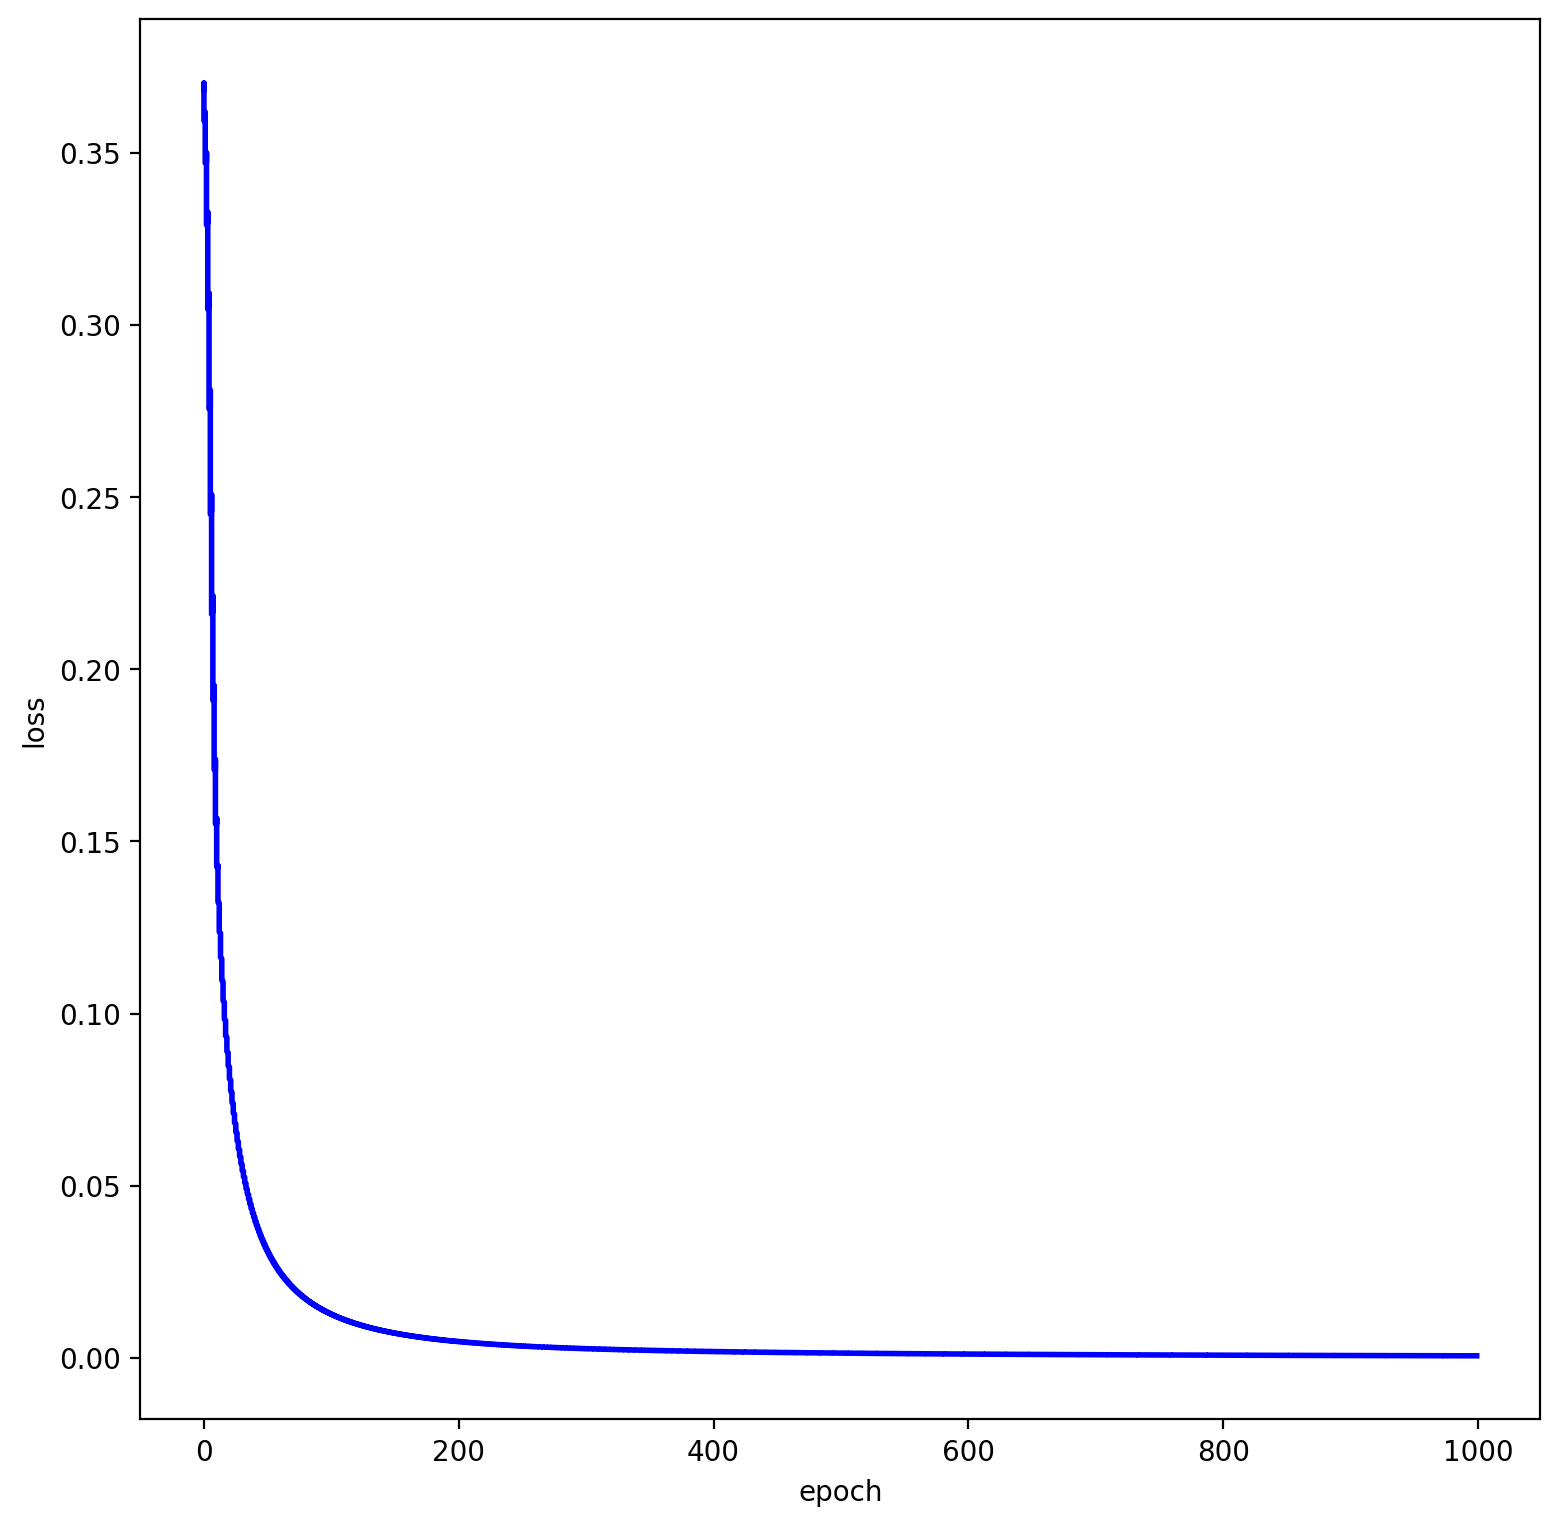

In [8]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'



def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  '''
  def __init__(self):
    # Weights
    self.w111 = np.random.normal()
    self.w112 = np.random.normal()
    self.w121 = np.random.normal()
    self.w122 = np.random.normal()
    self.w211 = np.random.normal()
    self.w212 = np.random.normal()

    # Biases
    self.b11 = np.random.normal()
    self.b12 = np.random.normal()
    self.b2 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    a11 = sigmoid(self.w111 * x[0] + self.w112 * x[1] + self.b11)
    a12 = sigmoid(self.w121 * x[0] + self.w122 * x[1] + self.b12)
    a2 = sigmoid(self.w211 * a11 + self.w212 * a12 + self.b2)
    return a2

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    epoch_vector=[]
    loss_vector=[]

    # the gradient descent algorithm
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_a11 = self.w111 * x[0] + self.w112 * x[1] + self.b11
        a11 = sigmoid(sum_a11)

        sum_a12 = self.w121 * x[0] + self.w122 * x[1] + self.b12
        a12 = sigmoid(sum_a12)

        sum_a2 = self.w211 * a11 + self.w212 * a12 + self.b2
        a2 = sigmoid(sum_a2)
        y_pred = a2

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron a2
        d_ypred_d_w211 = a11 * deriv_sigmoid(sum_a2) # dy/dw to know how to change the weights w for a given difference in y
        d_ypred_d_w212 = a12 * deriv_sigmoid(sum_a2)
        d_ypred_d_b2 = deriv_sigmoid(sum_a2)

        d_ypred_d_a11 = self.w211 * deriv_sigmoid(sum_a2)
        d_ypred_d_a12 = self.w212 * deriv_sigmoid(sum_a2)

        # Neuron a11
        d_a11_d_w111 = x[0] * deriv_sigmoid(sum_a11)
        d_a11_d_w112 = x[1] * deriv_sigmoid(sum_a11)
        d_a11_d_b11 = deriv_sigmoid(sum_a11)

        # Neuron a12
        d_a12_d_w121 = x[0] * deriv_sigmoid(sum_a12)
        d_a12_d_w122 = x[1] * deriv_sigmoid(sum_a12)
        d_a12_d_b12 = deriv_sigmoid(sum_a12)

        # --- Update weights and biases
        # Neuron a11
        self.w111 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w111
        self.w112 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w112
        self.b11 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_b11

        # Neuron a12
        self.w121 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w121
        self.w122 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w122
        self.b12 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_b12

        # Neuron a2
        self.w211 -= learn_rate * d_L_d_ypred * d_ypred_d_w211
        self.w212 -= learn_rate * d_L_d_ypred * d_ypred_d_w212
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_b2

      # --- Calculate total loss at the end of each epoch
      #if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        epoch_vector.append(epoch)
        loss_vector.append(loss)
        
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(epoch_vector,loss_vector, '-b', lw=2)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()
      
    
# Define dataset of period and amplitude
data = np.array([
  [0.9, 0.5],  
  [1.1, 0.55],
  [1.2, 0.65],   
  [1.1, 0.5], 
  [1.0, 0.65], 
  [1.1, 0.45],
  [1.1, 0.75],#6.5
  [10.5, 0.5],
  [13.4, 0.4],
  [11.14, 0.54],
  [11.49, 0.45],
  [13.4, 0.4],    
  [27.2, 0.65],
])
all_y_trues = np.array([
  1, # RRL
  1, # RRL    
  1, # RRL
  1, # RRL  
  1, # RRL    
  1, # RRL
  1, # RRL      
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
])



# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

When we plot loss vs. epochs we see that our loss steadily decreases as the network learns.

As the neural network is now trained, we can use it to make predictions:

In [12]:
# Make some predictions
source_1 = np.array([1.1, 0.4]) 
source_2 = np.array([20.3, 0.7]) 
print("probabilities of sources being RRL stars")
print("source_1: %.3f" % network.feedforward(source_1)) # likely RRL
print("source_2: %.3f" % network.feedforward(source_2)) # unlikely RRL (thus Cepheid)

probabilities of sources being RRL stars
source_1: 0.793
source_2: 0.027


# <font color='dodgerblue'>Things to try out:</font>


*  What happens when one example in the training set is labelled wrong?
*  What happens when training runs longer or shorter?
*  What happens when the activation function is modified?


## 3. Summary <a class="anchor" id="third-bullet"></a>

At this point, all of you should have:
* an understanding of what are the building blocks of neural networks
* and understanding of how they interact
* seen how to train a neural network with gradient descent and to use backpropagation to calculate partial derivatives
* experimented a bit with a neural network.

